# GridPath Workshop (UCSB)

Initialization

In [1]:
import os
import sys
import pandas as pd

# Print the current working directory. The result should end with state_model
software_dir = os.getcwd()
os.chdir("..")
print(software_dir)

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [2]:
#Setting this as the primary directory for all future use
# This is be the main folder where all files are created and stored in. 
directory = os.getcwd()
print(directory)

/Users/Guille/Desktop/state_model


In [3]:
# Defining the database directory - where the database file will be created and stored. 
db_dir = f"{directory}/db"

# Defining CSV inputs directory - where the state level input files are stored. 
csv_dir = f"{directory}/input_csvs_gridpath"

#Defining scenario folder location
scen_dir = f"{directory}/scenarios"

# GridPath
The following section is for running GridPath.

## User edit section
Add the folder name with input csvs and provide a name for this database.

In [4]:
# Speciific  model for this run.
# Add the name of the specific mode folder file by replacing the worth between " " 
input_csvs_gridpath = "TN_7-2050-12_simple"

# Add your database name below between "" or leave blank to use input_csvs_gridpath as database name
db_name = ""
db_name = db_name if db_name else input_csvs_gridpath
print(f"Database name is set to: {db_name}")

Database name is set to: TN_7-2050-12_simple


## Creating database, importing state inputs and importing scenarios to the database for modeling

In [5]:
!python {directory}/gridpath/db/create_database.py --database {db_dir}/{db_name}.db
!python {directory}/gridpath/db/utilities/port_csvs_to_db.py --database {db_dir}/{db_name}.db --csv_location {csv_dir}/{input_csvs_gridpath}
!python {directory}/gridpath/db/utilities/scenario.py --database {db_dir}/{db_name}.db --csv_path {csv_dir}/{input_csvs_gridpath}/scenarios.csv

                delete it before re-creating the database
Importing data for subscenario solver_options_id, table options_solver from /Users/Guille/Desktop/state_model/input_csvs_gridpath/TN_7-2050-12_simple/solver...
...importing CSV 4_gurobi_4th_high_mipgap.csv
   ...importing data from 4_gurobi_4th_high_mipgap.csv
Traceback (most recent call last):
  File "/Users/Guille/Desktop/state_model/gridpath/db/utilities/port_csvs_to_db.py", line 499, in <module>
    main()
  File "/Users/Guille/Desktop/state_model/gridpath/db/utilities/port_csvs_to_db.py", line 441, in main
    load_all_from_master_csv(
  File "/Users/Guille/Desktop/state_model/gridpath/db/utilities/port_csvs_to_db.py", line 191, in load_all_from_master_csv
    load_all_subscenario_ids_from_dir_to_subscenario_table(
  File "/Users/Guille/opt/anaconda3/envs/wri-india/lib/python3.8/site-packages/db/utilities/common_functions.py", line 1071, in load_all_subscenario_ids_from_dir_to_subscenario_table
    read_all_csv_subscenarios

In [13]:
# This will print out all possible scenarios available
scenario_csv = pd.read_csv(f"{csv_dir}/{input_csvs_gridpath}/scenarios.csv")
column_names = scenario_csv.columns[1:]

# Print scenario names
print("Available scenarios:")
for name in column_names:
    print(name)

Available scenarios:
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple
VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_4_2035_12_simple


## Select scenarios from the list above and add to the `selected_scenario` below before running.

### User Edit Section

In [14]:
# Add or remove scenarios from above to the list below:
scen_list = ["VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple",
             "VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple",
             "VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple"]

### Running selected scenarios

In [15]:
for selected_scenario in scen_list:
    !python {directory}/gridpath/gridpath/run_end_to_end.py --database {db_dir}/{db_name}.db --scenario {selected_scenario} --scenario_location {scen_dir}

Running scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple end to end
Process ID is 60708
End-to-end run started on 2024-10-22 12:20:22.904462
Getting inputs... (connected to database /Users/Guille/Desktop/state_model/db/TN_7-2050-12_simple.db)

Running optimization for scenario VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple
Building model...
Loading data...
Creating problem instance...
Solving...
Running scenario VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple end to end
Process ID is 60718
End-to-end run started on 2024-10-22 12:20:47.418609
Getting inputs... (connected to database /Users/Guille/Desktop/state_model/db/TN_7-2050-12_simple.db)
^C
SIGINT received by run_end_to_end.py. Terminating process.
Exiting gracefully
Running scenario VREhigh_SThigh_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_12_simple end to end
Process ID is 60722
End-to-end run started on 2024-10-22 12:20:50.204707
Getting i

# Visualization
The following section is for visualizing the results from the GridPath model above.

In [4]:
# Checking the directory is correct - should be state_model folder
os.chdir(software_dir)
print(os.getcwd())

/Users/Guille/Desktop/state_model/gridpath-workshop-ucsb


In [20]:
# loading packages and setting results folder
from loading_utils import * 
from plotting_utils import * 
from processing_utils import * 

path_to_scenarios = f"{directory}/scenarios"
print(path_to_scenarios)

/Users/Guille/Desktop/state_model/scenarios


Loading necessary functions for the zones, scenarios labels `<scenario_labels.csv>` and technology colors `<technology_labels.csv>` to plot the graph for new and existing capacity

In [21]:
scen_labels_     = pd.read_csv(directory + '/input_csvs_plotting/scenario_labels.csv') 
tech_labels_     = pd.read_csv(directory + '/input_csvs_plotting/technology_labels.csv') 
dispatch_labels_ = pd.read_csv(directory + '/input_csvs_plotting/dispatch_labels.csv') 

Load new and existing capacity across different scenarios, grouping the capacity by technology.

In [22]:
capacity_         = _load_new_and_existing_capacity(scen_labels_, path_to_scenarios)
grouped_capacity_ = _group_capacity_technologies(capacity_, tech_labels_)
grouped_capacity_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Technology,Zone,Status,Power,Energy
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Battery,Tamil_Nadu,new,0.000000,0.000000
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Battery,Tamil_Nadu,existing,0.000000,0.000000
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Coal,Tamil_Nadu,new,0.000000,0.000000
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Coal,Tamil_Nadu,existing,13911.187000,0.000000
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Curtailment,Tamil_Nadu,new,0.000000,0.000000
5,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Curtailment,Tamil_Nadu,existing,0.000000,0.000000
6,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Diesel,Tamil_Nadu,new,0.000000,0.000000
7,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Diesel,Tamil_Nadu,existing,0.000000,0.000000
8,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Export,Tamil_Nadu,new,0.000000,0.000000
9,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Export,Tamil_Nadu,existing,0.000000,0.000000


Plotting the new and existing capacity across different scenarios. Add title name for the plot.

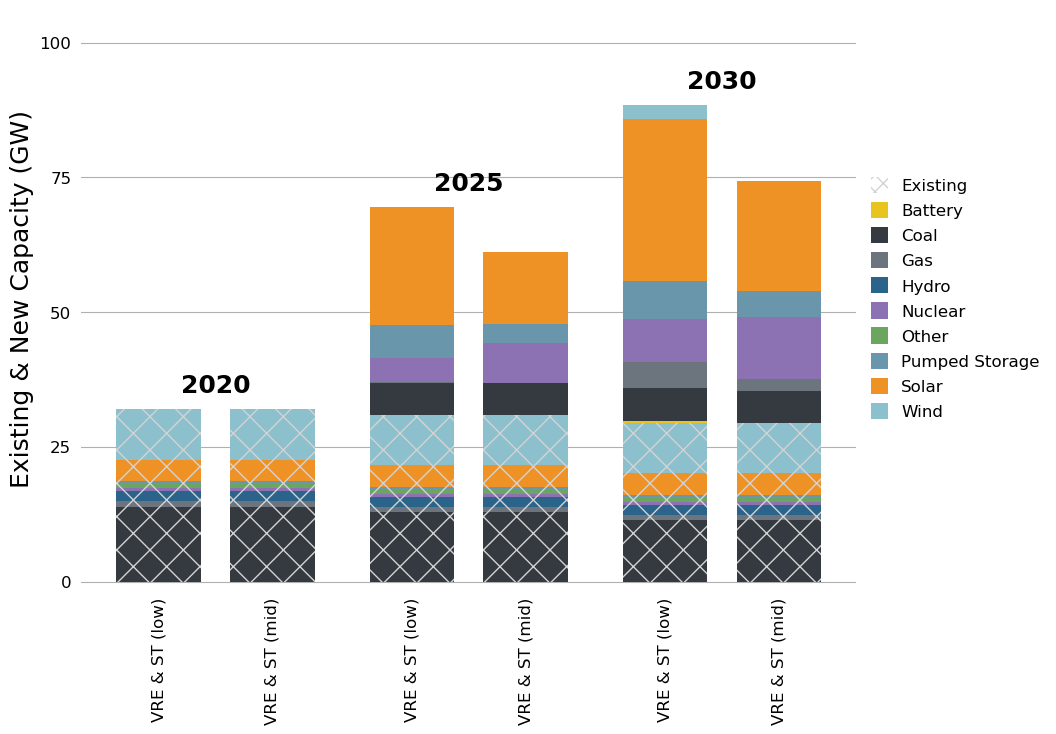

In [23]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_new_and_existing_capacity(grouped_capacity_, scen_labels_, tech_labels_,
                                units        = 1e3,
                                units_label  = 'Existing & New Capacity (GW)',
                                legend       = True,
                                save         = True,
                                y_grid_inc   = 25,
                                title        = '',
                                file_name    = directory + r'/plots/group_installed_capacity.png')

Energy dispatch by scenarios, zone and date

In [24]:
ed_ = _processing_energy_dispatch_capex(scen_labels_, path_to_scenarios)
ed_ = _group_dispatch_technologies_by_zone_and_date(ed_, tech_labels_)

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


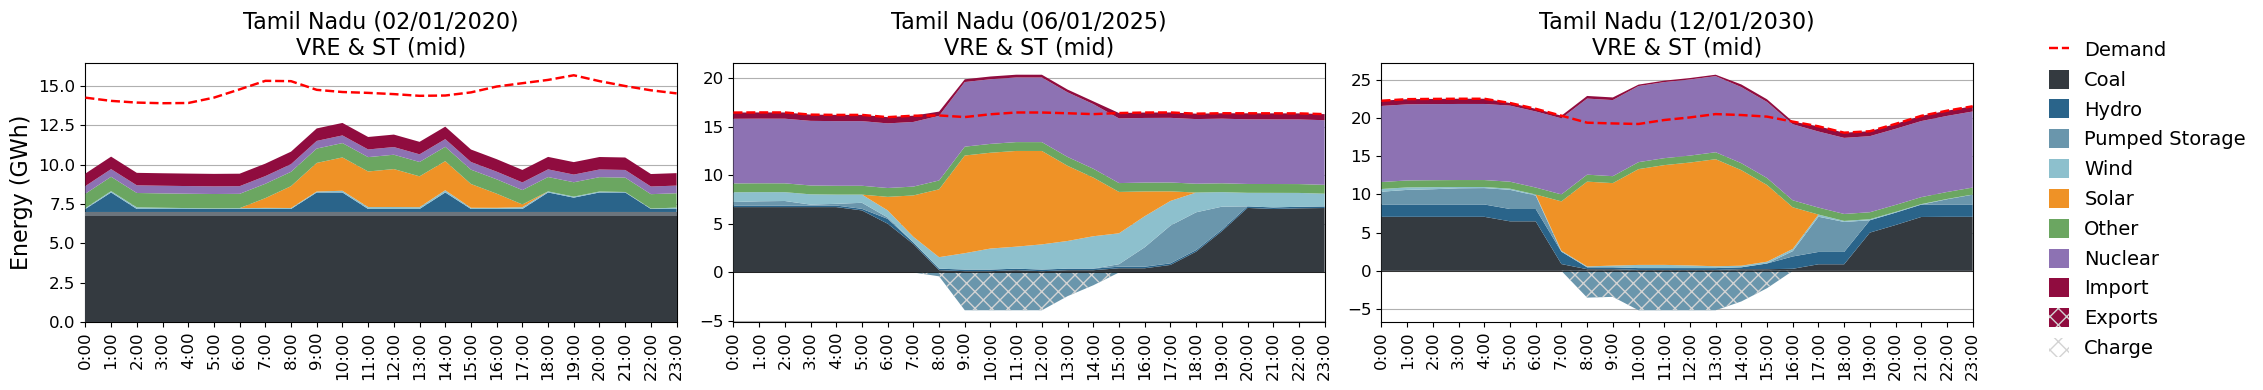

In [25]:
# Plot energy dispatch for a given day
_plot_zone_energy_dispatch(ed_, scen_labels_, tech_labels_, dispatch_labels_,
                           save      = True,
                           legend    = True,
                           file_name = directory + r'/plots/energy_dispatch.png')

Load energy dispatch across scenarios and group the energy dispatch by technology

In [26]:
dispatch_         = _load_energy_dispatch(scen_labels_, path_to_scenarios)
tx_losses_        = _load_energy_transmission(scen_labels_, path_to_scenarios)
dispatch_         = _merge_dispatch_and_tx_losses_(dispatch_, tx_losses_)
grouped_dispatch_ = _group_dispatch_technologies(dispatch_, tech_labels_)
grouped_dispatch_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Technology,Zone,Energy
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Coal,Tamil_Nadu,58425993.631182
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Gas,Tamil_Nadu,2264931.227710
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Diesel,Tamil_Nadu,0.000000
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Hydro,Tamil_Nadu,5597077.006610
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Pumped Storage,Tamil_Nadu,-55240.476620
5,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Wind,Tamil_Nadu,6724410.700687
6,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Solar,Tamil_Nadu,5824864.824750
7,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Other,Tamil_Nadu,7989200.910000
8,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Hydrogen,Tamil_Nadu,0.000000
9,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Battery,Tamil_Nadu,0.000000


Plotting energy dispatch per technology for different scenarios

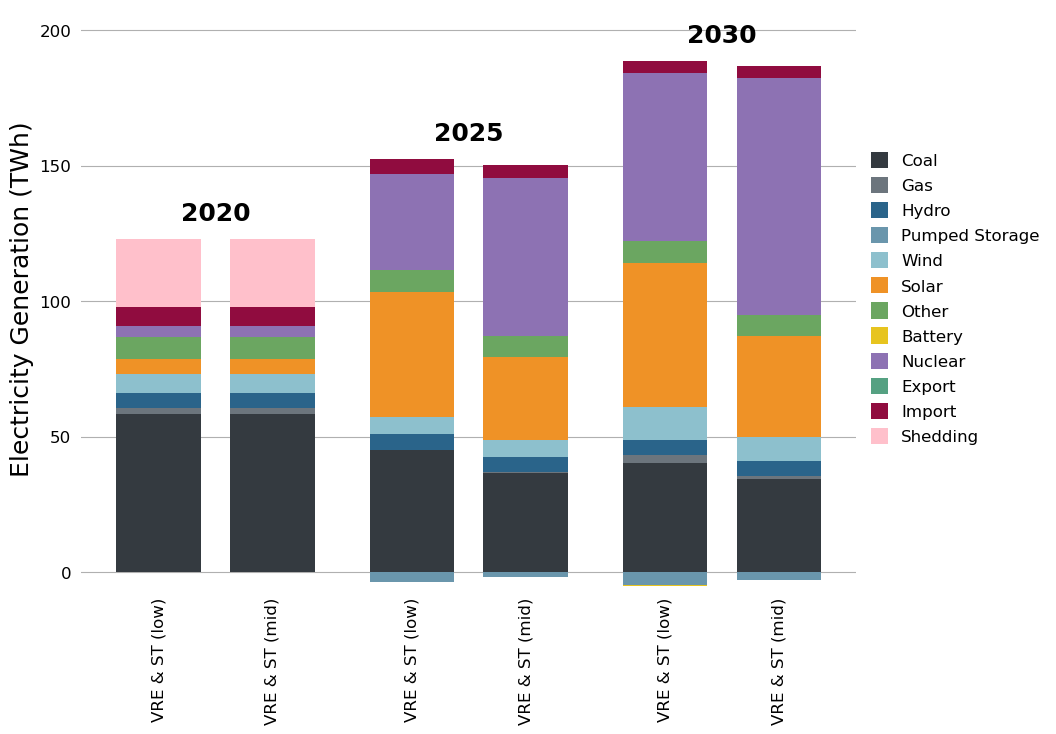

In [27]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_dispatch(grouped_dispatch_, scen_labels_,  tech_labels_, 
               units        = 1e6, 
               units_label  = r'Electricity Generation (TWh)',
               save         = True,
               legend       = True,
               y_grid_inc   = 50,
               title        = '',
               file_name    = directory + r'/plots/group_electricity_generation.png')

Load Greenhouse Gas (GHG) emissions and load energy demand for different scenarios

In [28]:
emissions_, demand_ = _load_GHG_emissions(scen_labels_, path_to_scenarios)
emissions_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Technology,Zone,GHG
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Biomass,Tamil_Nadu,0.000000
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,CCGT,Tamil_Nadu,948100.218926
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,CT,Tamil_Nadu,0.000000
3,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Subcritical_Coal_Large,Tamil_Nadu,7580849.984064
4,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Subcritical_Coal_Small,Tamil_Nadu,33155578.319837
5,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Supercritical_Coal,Tamil_Nadu,16958893.335206
6,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Biomass,Tamil_Nadu,0.000000
7,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,CCGT,Tamil_Nadu,92948.664286
8,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,CT,Tamil_Nadu,0.000000
9,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Subcritical_Coal_Large,Tamil_Nadu,5673448.990558


Plot GHG emissions for different scenarios

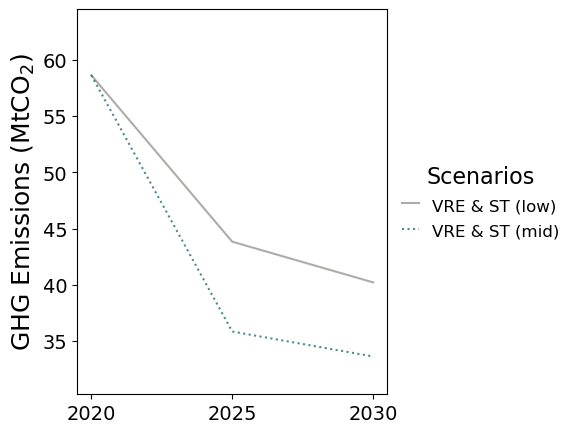

In [29]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions(emissions_, scen_labels_, 
                units      = 1e6,
                unit_label = r'GHG Emissions (MtCO$_2$)',
                save       = True,
                legend     = True,
                title      = '',
                file_name  = directory + r'/plots/GHG_emissions.png')

Processing GHG emissions intensity for different scenarios

In [30]:
intesity_, demand_ = _GHG_emissions_intensity(emissions_, demand_)
intesity_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Zone,Period,GHG,Load,Intensity
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2020,58643421.858033,123091038.814881,0.476423
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2025,43831755.586285,148788203.794906,0.294592
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2030,40212219.275034,183972510.509319,0.218577
3,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2020,58643421.858033,123091038.814881,0.476423
4,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2025,35841384.008124,148788203.794906,0.240889
5,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,Tamil_Nadu,2030,33621493.349173,183972510.509319,0.182753


Plot GHG emissions intensity for different scenarios

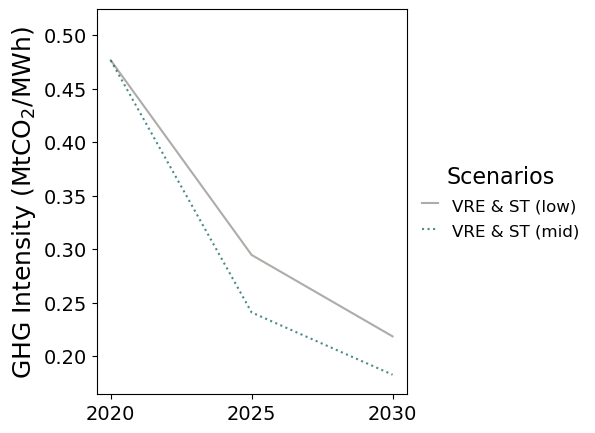

In [31]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_emissions_intensity(intesity_, scen_labels_, 
                          unit_label = r'GHG Intensity (MtCO$_2$/MWh)',
                          save       = True,
                          legend     = True,
                          title      = '',
                          file_name  = directory + r'/plots/GHG_emissions_intensity.png')

Load system cost data for different scenarios

In [32]:
system_cost_ = _load_system_cost(scen_labels_, path_to_scenarios)
system_cost_.style

VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24
VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24


,Scenario,Period,Zone,Variable_Costs,Fix_Costs,Load,Cost,LCOE
0,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Tamil_Nadu,3411362264.667145,3184222192.264765,123091038.814881,6595584456.931910,53.582978
1,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Tamil_Nadu,3684671489.2542977,6846517781.125552,148788203.794906,10531189270.379850,70.779733
2,VRElow_STlow_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2030,Tamil_Nadu,4556670368.129175,8269714617.686215,183972510.509319,12826384985.815392,69.719030
3,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2020,Tamil_Nadu,3411362264.667145,3184222192.264765,123091038.814881,6595584456.931910,53.582978
4,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2025,Tamil_Nadu,3955761666.7386336,6848325794.59684,148788203.794906,10804087461.335474,72.613871
5,VREmid_STmid_CONVmid_BPHS_NuclearPVboth_45Ret_PRM110_TN_3_2030_24,2030,Tamil_Nadu,4845670919.954027,8097993571.704059,183972510.509319,12943664491.658085,70.356514


Plot system Levelized Cosst of Electricity (LCOE) for different scenarios

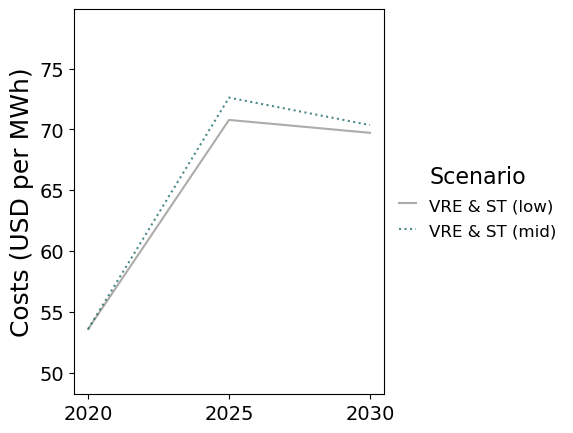

In [33]:
# Enter a title of your choice between the quotation marks ('') under title = ''.
_plot_system_cost(system_cost_, scen_labels_, 
                  unit_label = r'Costs (USD per MWh)', 
                  save       = True, 
                  legend     = True,
                  title      = '', 
                  file_name  = directory + r'/plots/system_cost.png')

In [35]:
# Replace with a specific scenario if needed, otherwise leave blank
scenario = '' 
# Replace with 'new' or existing' so only new capacity is shown, otherwise leave blank for new and existing
status = 'existing' 

# User-defined scenario filter (can be left blank for all scenarios)
filtered_capacity_ = _filter_capacity(grouped_capacity_, scenario, status)
# Display the wide format dataframe
filtered_capacity_.style